<a href="https://colab.research.google.com/github/batiukmaks/Machine-Learning-Labs/blob/main/labs/lab-4/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data: https://github.com/JRappaz/liverec

In [1]:
!pip install numpy
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357247 sha256=f5a67cd34d7284302f83074a0e3348a7d640d46e78b57f61ca2de15b7d6cbe0f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
DATASET_PATH = "/content/drive/MyDrive/LPNU/machine-learning/lab-4/100k_a.csv"

# Prepare Data

In [5]:
raw_df = pd.read_csv(DATASET_PATH, header=None, names=["user_id", "stream_id", "streamer_name", "start_time", "stop_time"])
print("Shape:", raw_df.shape)
raw_df

Shape: (3051733, 5)


,user_id,stream_id,streamer_name,start_time,stop_time
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594
...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583
3051729,100000,34168288656,natehill,3582,3583
3051730,100000,34169594512,fortnite,3582,3584
3051731,100000,34180223072,highdistortion,3709,3711


In [6]:
raw_df.dtypes

user_id           int64
stream_id         int64
streamer_name    object
start_time        int64
stop_time         int64
dtype: object

In [7]:
for col in ["user_id", "stream_id", "streamer_name"]:
    print(f"There are {raw_df[col].nunique()} values in {col} column")

There are 100000 values in user_id column
There are 739991 values in stream_id column
There are 162625 values in streamer_name column


In [8]:
transformed_df = raw_df.copy()
transformed_df["duration"] = transformed_df["stop_time"] - transformed_df["start_time"]
transformed_df['avg_duration'] = transformed_df.groupby(['user_id', 'streamer_name'])['duration'].transform('mean')
transformed_df['sum_duration'] = transformed_df.groupby(['user_id', 'streamer_name'])['duration'].transform('sum')
transformed_df = transformed_df.drop_duplicates(['user_id', 'streamer_name'])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(transformed_df['streamer_name'])
transformed_df['encoded_streamer_name'] = le.transform(transformed_df['streamer_name'])

In [9]:
transformed_df

,user_id,stream_id,streamer_name,start_time,stop_time,duration,avg_duration,sum_duration,encoded_streamer_name
0,1,33842865744,mithrain,154,156,2,1.25,10,92273
1,1,33846768288,alptv,166,169,3,3.00,3,5331
3,1,33887624992,wtcn,589,591,2,2.20,11,155056
4,1,33890145056,jrokezftw,591,594,3,2.00,4,68370
5,1,33903958784,berkriptepe,734,737,3,3.00,3,13842
...,...,...,...,...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583,1,1.00,1,88577
3051729,100000,34168288656,natehill,3582,3583,1,1.00,1,97752
3051730,100000,34169594512,fortnite,3582,3584,2,2.00,2,45993
3051731,100000,34180223072,highdistortion,3709,3711,2,2.00,2,56500


In [10]:
transformed_df["normalized_sum_duration"] = (transformed_df["sum_duration"] - transformed_df["sum_duration"].min()) / (transformed_df["sum_duration"].max() - transformed_df["sum_duration"].min())
transformed_df["standartized_sum_duration"] = (transformed_df["sum_duration"] - transformed_df["sum_duration"].mean()) / transformed_df["sum_duration"].std()

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler(feature_range=(0, 5))
transformed_df['rescaled_0_5_sum_duration'] = mm_scaler.fit_transform(transformed_df[['sum_duration']])

mm_scaler = MinMaxScaler(feature_range=(0, 10))
transformed_df['rescaled_0_10_sum_duration'] = mm_scaler.fit_transform(transformed_df[['sum_duration']])

mm_scaler = MinMaxScaler(feature_range=(-5, 5))
transformed_df['rescaled_neg5_5_sum_duration'] = mm_scaler.fit_transform(transformed_df[['sum_duration']])

transformed_df.describe()

,user_id,stream_id,start_time,stop_time,duration,avg_duration,sum_duration,encoded_streamer_name,normalized_sum_duration,standartized_sum_duration,rescaled_0_5_sum_duration,rescaled_0_10_sum_duration,rescaled_neg5_5_sum_duration
count,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06,1.505158e+06
mean,5.030758e+04,3.408595e+10,2.682678e+03,2.685309e+03,2.630261e+00,2.653075e+00,6.370568e+00,8.200163e+04,8.484309e-03,-3.491443e-17,4.242155e-02,8.484309e-02,-4.915157e+00
std,2.889831e+04,1.729025e+08,1.821536e+03,1.821463e+03,3.518424e+00,3.104475e+00,1.302834e+01,4.700053e+04,2.058190e-02,1.000000e+00,1.029095e-01,2.058190e-01,2.058190e-01
min,1.000000e+00,3.380153e+10,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.122219e-01,0.000000e+00,0.000000e+00,-5.000000e+00
25%,2.527100e+04,3.393207e+10,1.039000e+03,1.042000e+03,1.000000e+00,1.000000e+00,1.000000e+00,4.079700e+04,0.000000e+00,-4.122219e-01,0.000000e+00,0.000000e+00,-5.000000e+00
50%,5.023200e+04,3.406943e+10,2.507000e+03,2.510000e+03,1.000000e+00,1.500000e+00,2.000000e+00,8.323600e+04,1.579779e-03,-3.354662e-01,7.898894e-03,1.579779e-02,-4.984202e+00
75%,7.546600e+04,3.423054e+10,4.249000e+03,4.252000e+03,3.000000e+00,3.000000e+00,6.000000e+00,1.232680e+05,7.898894e-03,-2.844320e-02,3.949447e-02,7.898894e-02,-4.921011e+00
max,1.000000e+05,3.441638e+10,6.147000e+03,6.148000e+03,9.700000e+01,9.700000e+01,6.340000e+02,1.626240e+05,1.000000e+00,4.817416e+01,5.000000e+00,1.000000e+01,5.000000e+00


In [11]:
from surprise import Dataset, Reader

raw_reader = Reader(rating_scale=(transformed_df["sum_duration"].min(), transformed_df["sum_duration"].max()))
raw_data = Dataset.load_from_df(transformed_df[["user_id", "encoded_streamer_name", "sum_duration"]], raw_reader)
print("Raw Data Scale:", raw_reader.rating_scale)

normalized_reader = Reader(rating_scale=(0, 1))
normalized_data = Dataset.load_from_df(transformed_df[["user_id", "encoded_streamer_name", "normalized_sum_duration"]], normalized_reader)
print("Normalized Data Scale:", normalized_reader.rating_scale)

standartized_reader = Reader(rating_scale=(transformed_df["standartized_sum_duration"].min(), transformed_df["standartized_sum_duration"].max()))
standartized_data = Dataset.load_from_df(transformed_df[["user_id", "encoded_streamer_name", "standartized_sum_duration"]], standartized_reader)
print("Standartized Data Scale:", standartized_reader.rating_scale)

rescaled_0_5_reader = Reader(rating_scale=(0, 5))
rescaled_0_5_data = Dataset.load_from_df(transformed_df[["user_id", "encoded_streamer_name", "rescaled_0_5_sum_duration"]], rescaled_0_5_reader)
print("Rescaled (0, 5) Data Scale:", rescaled_0_5_reader.rating_scale)

rescaled_0_10_reader = Reader(rating_scale=(0, 10))
rescaled_0_10_data = Dataset.load_from_df(transformed_df[["user_id", "encoded_streamer_name", "rescaled_0_10_sum_duration"]], rescaled_0_10_reader)
print("Rescaled (0, 10) Data Scale:", rescaled_0_10_reader.rating_scale)

rescaled_neg5_5_reader = Reader(rating_scale=(-5, 5))
rescaled_neg5_5_data = Dataset.load_from_df(transformed_df[["user_id", "encoded_streamer_name", "rescaled_neg5_5_sum_duration"]], rescaled_neg5_5_reader)
print("Rescaled (-5, 5) Data Scale:", rescaled_neg5_5_reader.rating_scale)

Raw Data Scale: (1, 634)
Normalized Data Scale: (0, 1)
Standartized Data Scale: (-0.41222192396758106, 48.17416418126106)
Rescaled (0, 5) Data Scale: (0, 5)
Rescaled (0, 10) Data Scale: (0, 10)
Rescaled (-5, 5) Data Scale: (-5, 5)


In [12]:
data_configs = {
    "raw": {
        "name": "Raw",
        "data": raw_data,
        "reader": raw_reader,
    },
    "normalized": {
        "name": "Normalized",
        "data": normalized_data,
        "reader": normalized_reader,
    },
    "standartized": {
        "name": "Standartized",
        "data": standartized_data,
        "reader": standartized_reader,
    },

    "rescaled_0_5": {
        "name": "Rescaled (0, 5)",
        "data": rescaled_0_5_data,
        "reader": rescaled_0_5_reader,
    },
    "rescaled_0_10": {
        "name": "Rescaled (0, 10)",
        "data": rescaled_0_10_data,
        "reader": rescaled_0_10_reader,
    },
    "rescaled_neg5_5": {
        "name": "Rescaled (-5, 5)",
        "data": rescaled_neg5_5_data,
        "reader": rescaled_neg5_5_reader,
    },
}

# Train Models

In [13]:
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split

def train_and_test(data, params={}):
    trainset, testset = train_test_split(data, test_size=0.2)

    algo = SVD(**params)
    algo.fit(trainset)
    predictions = algo.test(testset)

    rmse = accuracy.rmse(predictions, verbose=0)
    mae = accuracy.mae(predictions, verbose=0)

    print("RMSE:", rmse)
    print("MAE:", mae)

    return rmse, mae, algo, predictions

In [22]:
training_results = [] # (rmse, mae, predictions)

for key, val in data_configs.items():
    name = val.get("name")
    print(name)
    rmse, mae, algo, predictions = train_and_test(data=val.get("data"))
    training_results.append((name, rmse, mae, predictions))
    print()


Raw
RMSE: 627.5368626859375
MAE: 627.1690870762737

Normalized
RMSE: 0.048943415532837056
MAE: 0.027269795549572894

Standartized
RMSE: 0.9807523926277548
MAE: 0.47900583861942236

Rescaled (0, 5)
RMSE: 0.10996189900455952
MAE: 0.06060967780729891

Rescaled (0, 10)
RMSE: 0.20360985667148795
MAE: 0.10583368036844686

Rescaled (-5, 5)
RMSE: 0.2063661914187424
MAE: 0.10653866936959433



# Analyze results on Normalized Data

In [188]:
normalized_predictions_df = pd.DataFrame(training_results[1][3])
normalized_predictions_df["diff"] = abs(normalized_predictions_df["r_ui"] - normalized_predictions_df["est"])

In [194]:
worst_10_df = normalized_predictions_df[normalized_predictions_df["r_ui"] != 0].sort_values("diff", ascending=False)[:10]
worst_10_df

,uid,iid,r_ui,est,details,diff
230126,69824,158925,1.000000,0.027229,{'was_impossible': False},0.972771
275909,4810,25202,0.723539,0.019477,{'was_impossible': False},0.704062
257701,52872,83603,0.758294,0.083809,{'was_impossible': False},0.674484
131419,70340,92766,0.654028,0.012878,{'was_impossible': False},0.641151
69875,19419,147380,0.608215,0.000000,{'was_impossible': False},0.608215
170174,57421,93559,0.578199,0.038590,{'was_impossible': False},0.539609
220550,73736,118492,0.571880,0.033880,{'was_impossible': False},0.538000
216691,98562,66668,0.671406,0.146111,{'was_impossible': False},0.525295
89685,15834,2559,0.533965,0.013588,{'was_impossible': False},0.520377
101223,35731,117036,0.680885,0.181764,{'was_impossible': False},0.499121


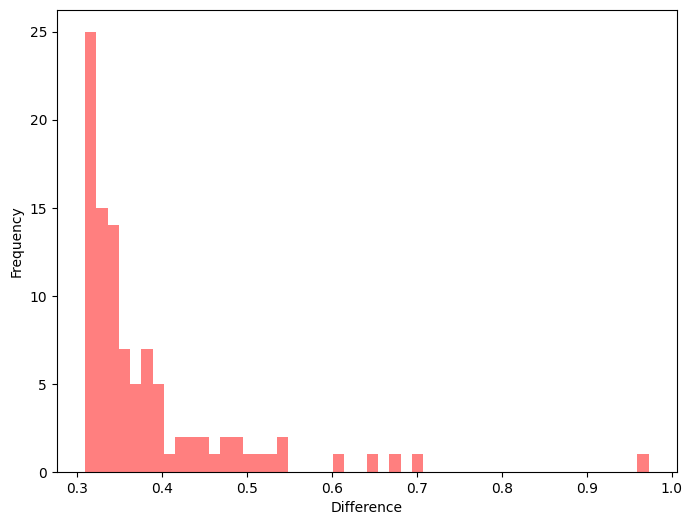

In [195]:
worst_100_df = normalized_predictions_df[normalized_predictions_df["r_ui"] != 0].sort_values("diff", ascending=False)[:100]

plt.figure(figsize=(8,6))
plt.hist(worst_100_df['diff'], bins=50, alpha=0.5, color='r')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

In [197]:
best_10_df = normalized_predictions_df.sort_values("diff", ascending=True)[:10]
best_10_df

,uid,iid,r_ui,est,details,diff
240677,40876,114653,0.0,0.0,{'was_impossible': False},0.0
55953,58341,7186,0.0,0.0,{'was_impossible': False},0.0
55956,57143,50508,0.0,0.0,{'was_impossible': False},0.0
170297,51488,28611,0.0,0.0,{'was_impossible': False},0.0
133290,63861,114350,0.0,0.0,{'was_impossible': False},0.0
223414,95515,80445,0.0,0.0,{'was_impossible': False},0.0
223415,4896,50140,0.0,0.0,{'was_impossible': False},0.0
275497,36709,158413,0.0,0.0,{'was_impossible': False},0.0
55968,94008,46981,0.0,0.0,{'was_impossible': False},0.0
170291,89780,43861,0.0,0.0,{'was_impossible': False},0.0


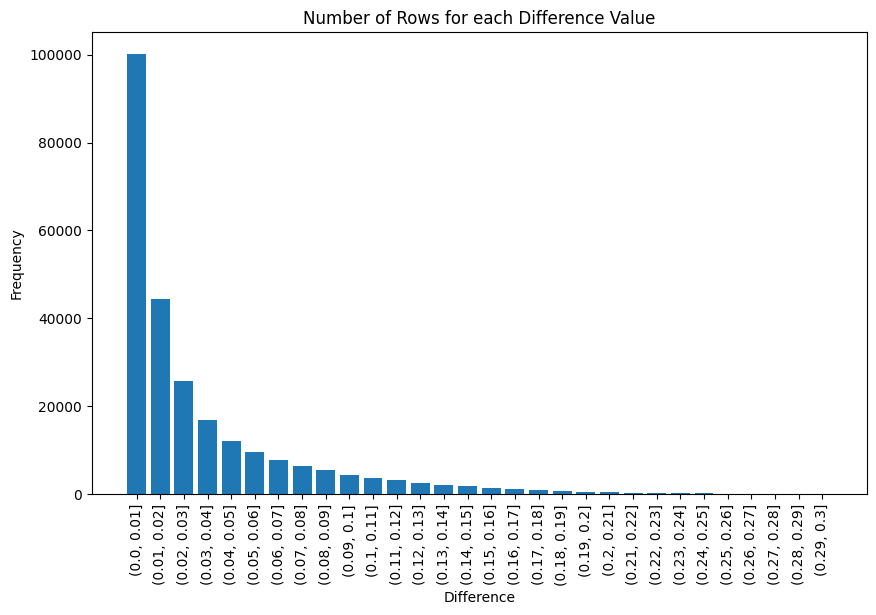

In [198]:
import numpy as np

df = normalized_predictions_df[normalized_predictions_df["diff"] < 0.3].reset_index(drop=True).copy()

bin_size = 0.01
bins = np.arange(0, df['diff'].max() + bin_size, bin_size)
df['diff_bin'] = pd.cut(df['diff'], bins=bins)

grouped_df = df.groupby('diff_bin').size().reset_index(name='counts')

plt.figure(figsize=(10,6))
plt.bar(x=grouped_df['diff_bin'].astype(str), height=grouped_df['counts'])
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 90-degrees
plt.title('Number of Rows for each Difference Value')
plt.show()

# Better Version

In [14]:
from scipy.stats import zscore

transformed_df2 = transformed_df.copy()
transformed_df2['zscore'] = zscore(transformed_df2['sum_duration'])
transformed_df2['zscore'].min(), transformed_df2['zscore'].max()

(-0.41222206090407854, 48.17418018429469)

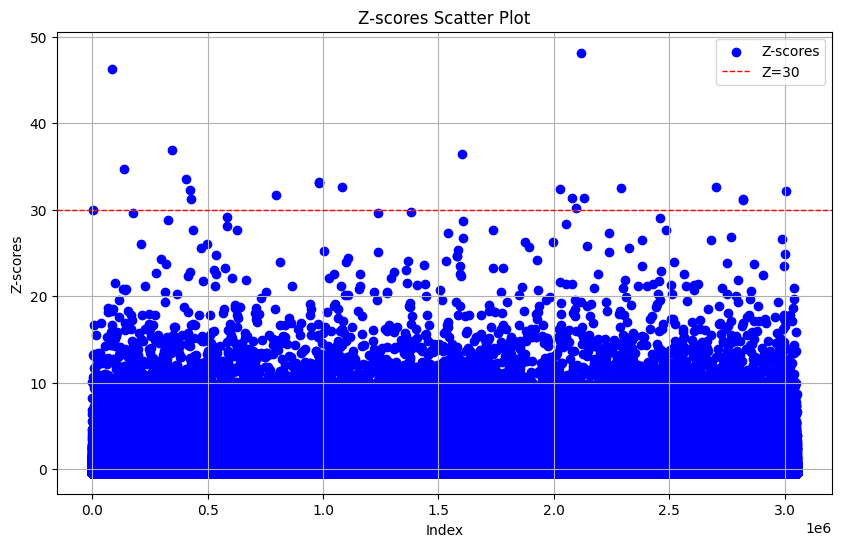

In [15]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(transformed_df2.index, transformed_df2['zscore'], color='blue', label='Z-scores')
plt.axhline(30, color='red', linestyle='dashed', linewidth=1, label='Z=30')  # Threshold line
plt.title('Z-scores Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Z-scores')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
transformed_df2 = transformed_df2[transformed_df2['zscore'] < 30]
transformed_df.shape, transformed_df2.shape

((1505158, 14), (1505137, 15))

In [234]:
zscored_normalized_reader2 = Reader(rating_scale=(0, 1))
zscored_normalized_data2 = Dataset.load_from_df(transformed_df[["user_id", "encoded_streamer_name", "normalized_sum_duration"]], zscored_normalized_reader2)
print("Normalized Data Scale:", zscored_normalized_reader2.rating_scale)

zscored_rmse, zscored_mae, zscored_algo, zscored_predictions = train_and_test(data=zscored_normalized_data2)

Normalized Data Scale: (0, 1)
RMSE: 0.04910474743054498
MAE: 0.027312516123552878


In [ ]:
Normalized
RMSE: 0.048943415532837056
MAE: 0.027269795549572894

In [19]:
# zscored_normalized_reader2 = Reader(rating_scale=(0, 1))
# zscored_normalized_data2 = Dataset.load_from_df(transformed_df[["user_id", "encoded_streamer_name", "normalized_sum_duration"]], zscored_normalized_reader2)
# print("Normalized Data Scale:", zscored_normalized_reader2.rating_scale)

# epoch_grid = [20]
# lr_all_grid = [0.001, 0.01, 0.1]
# reg_all_grid = [0.01, 0.04, 0.09]
# data_grid = [
#     ("Normalized", normalized_data),
#     ("ZScored Normalized", zscored_normalized_data2),
# ]

# grid_results = []
# for data_name, data in data_grid:
#     for epochs in epoch_grid:
#         for lr_all in lr_all_grid:
#             for reg_all in reg_all_grid:
#                 params = {
#                     "n_epochs": epochs,
#                     "lr_all": lr_all,
#                     "reg_all": reg_all,
#                 }
#                 print(params)
#                 rmse, mae, _, _ = train_and_test(data=data, params=params)
#                 grid_results.append({
#                         "data": data_name,
#                         "RMSE": rmse,
#                         "MAE": mae,
#                         "params": params,
#                 })
#                 print()

Normalized Data Scale: (0, 1)
{'n_epochs': 20, 'lr_all': 0.001, 'reg_all': 0.01}
RMSE: 0.06219792791400116
MAE: 0.036417538290945316

{'n_epochs': 20, 'lr_all': 0.001, 'reg_all': 0.04}
RMSE: 0.05637678739955679
MAE: 0.03223642217188313

{'n_epochs': 20, 'lr_all': 0.001, 'reg_all': 0.09}
RMSE: 0.050985391188389524
MAE: 0.028532612861289778

{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.01}
RMSE: 0.04771760919022709
MAE: 0.026463542450654742

{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.04}
RMSE: 0.038085635591439154
MAE: 0.02042025302817398

{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.09}
RMSE: 0.0308906103614192
MAE: 0.016241123983852752

{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.01}
RMSE: 0.030121157587673877
MAE: 0.015665577623575767

{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.04}
RMSE: 0.022757985592084334
MAE: 0.01138062437766703

{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.09}
RMSE: 0.02109695318745022
MAE: 0.010418298583783892

{'n_epochs': 20, 'lr_all': 0.001, 'reg_all'

In [20]:
grid_results_df = pd.DataFrame(grid_results)
grid_results_df.sort_values(["RMSE", "MAE"], ascending=True)

,data,RMSE,MAE,params
8,Normalized,0.021097,0.010418,"{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.09}"
17,ZScored Normalized,0.021171,0.010442,"{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.09}"
16,ZScored Normalized,0.022462,0.011235,"{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.04}"
7,Normalized,0.022758,0.011381,"{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.04}"
6,Normalized,0.030121,0.015666,"{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.01}"
15,ZScored Normalized,0.030127,0.015781,"{'n_epochs': 20, 'lr_all': 0.1, 'reg_all': 0.01}"
14,ZScored Normalized,0.030835,0.016225,"{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.09}"
5,Normalized,0.030891,0.016241,"{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.09}"
13,ZScored Normalized,0.037821,0.020280,"{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.04}"
4,Normalized,0.038086,0.020420,"{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.04}"
